# Prosper Loan
## by (Omar Adel)

## Investigation Overview

> The goal of my investigation is to look at the aspects of each loan amount, and figure out what factors influence prosper loans, it's borrorwer's interest rate and the lender yield.

## Dataset Overview

> This data set contains several loans with many variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
desired_width = 320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 81)


loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,10/11/2001 0:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2/27/2014 8:28,680.0,699.0,3/18/1996 0:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,7/27/2002 0:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,10/22/2012 11:02,800.0,819.0,2/28/1983 0:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,9/14/2013 18:38,680.0,699.0,2/20/2004 0:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A18036930218888920068

In [3]:
# Creating a new dataset with the desired variables with least null values.
loans_edited = loans[['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'Investors']]
loans_edited.head()

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),EmploymentStatus,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,0,Self-employed,"$25,000-49,999",True,3083.333333,0,9425,Q3 2007,330.43,258
1,10273602499503308B223C1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,2,Employed,"$50,000-74,999",True,6125.000000,0,10000,Q1 2014,318.93,1
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,0,Not available,Not displayed,True,2083.333333,0,3001,Q1 2007,123.32,41
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,16,Employed,"$25,000-49,999",True,2875.000000,0,10000,Q4 2012,321.45,158
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,2,Employed,"$100,000+",True,9583.333333,0,15000,Q3 2013,563.97,20


In [4]:
# Removing null values from each variable.
loans_edited.dropna(inplace=True)
loans_edited.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
EstimatedEffectiveYield      0
EstimatedLoss                0
EstimatedReturn              0
ProsperScore                 0
ListingCategory (numeric)    0
EmploymentStatus             0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Income Range

> 1. We can observe two trends. The first one is the majority of borrowers applying for loans have an income range between 25k to 75k with Income Range between 50 to 75 in the first place.
> 2. The Second trend is between 75k to 100+.

In [5]:
income_range = ['$100,000+','$75,000-99,999', '$50,000-74,999' , '$25,000-49,999', '$1-24,999', 'Not employed']
IncomeRange = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
loans_edited['IncomeRange'] = loans_edited['IncomeRange'].astype(IncomeRange)

In [6]:
income_count = loans_edited.IncomeRange.value_counts()
income_count

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
Name: IncomeRange, dtype: int64

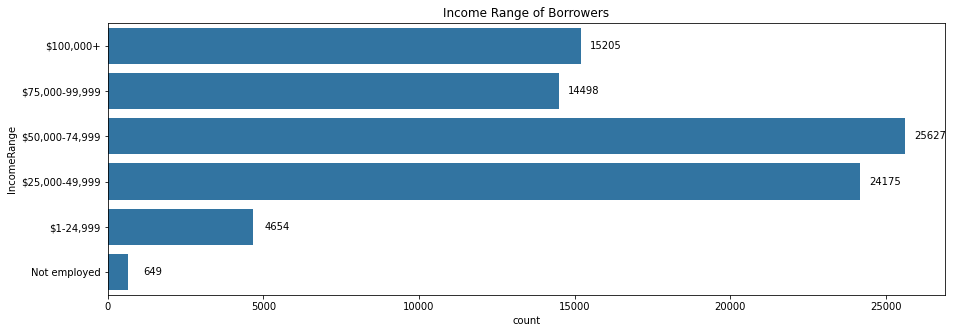

In [7]:
plt.figure(figsize=[15,5])
plt.title('Income Range of Borrowers')
base_color = sb.color_palette()[0]
sb.countplot(data=loans_edited, y='IncomeRange', color=base_color);
for i in range(income_count.shape[0]):
        count = income_count[i]
        plt.text(count + 800, i, count, va='center', ha='center')

## Borrower Interest Rate

> TThe plot is almost normally distributed with a spike in interest rate of 32% with interest rates ranged between 0.10 and 0.25

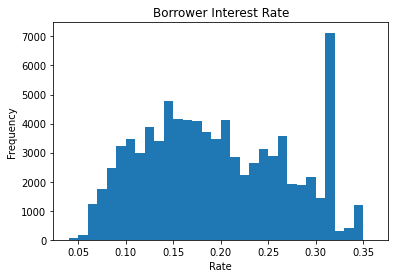

In [8]:
plt.title('Borrower Interest Rate')
bins = np.arange(0.04, 0.36+0.01, 0.01)
plt.hist(data=loans_edited, x='BorrowerRate', bins=bins);
plt.xlabel('Rate')
plt.ylabel('Frequency');

## Term (The Duration of Loan)


> We can observe that 36 Months - Term has occured the most, with 60 Months coming in the second place and 12 months is the least occurring. This means that almost every loan is a 3 years loan


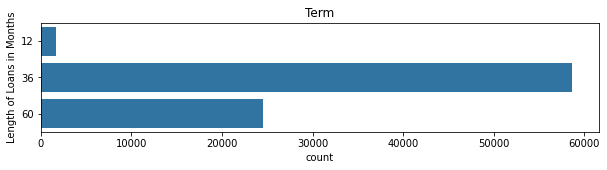

In [9]:
plt.figure(figsize=[10,2])
plt.title('Term')
base_color = sb.color_palette()[0]
sb.countplot(data=loans_edited, y='Term', color=base_color);
plt.ylabel('Length of Loans in Months');

## Do monthly payments increase by the increase in loan amounts?

>There's a postivie relationship between Loan Amount and Monthly Loan Payment as we observe and most of the data falls bettween 1000 Monthly Loan payment and 30000 Loan Original Amount. On the contrary, I made a diagonal to mark the other trend which is Small Loan Amounts can have large monthly payments but that trends lies between 0 - 15000 Loan Original Amounts

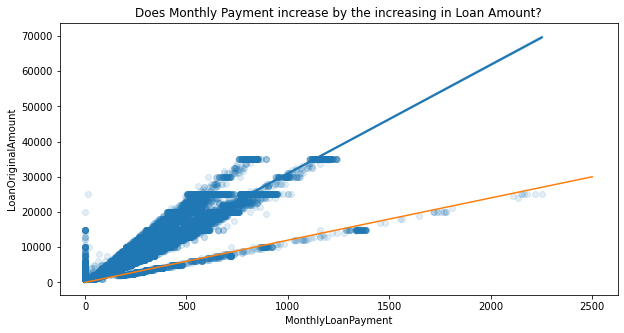

In [10]:
plt.figure(figsize=(10,5))
plt.title('Does Monthly Payment increase by the increasing in Loan Amount?')
sb.regplot(data=loans_edited, x='MonthlyLoanPayment', y='LoanOriginalAmount', x_jitter=0.5, scatter_kws={'alpha':1/8})
plt.plot([0,2500], [0,30000]);

## Does borrower income range affect the term (duration) of the loan?

> We can observe that if you have a high income range that doesn't necessarily mean that you're going for a high term loan. 36 Term has the most count values then comes 60. People with Income Range between 25k and 75k tend to get a loan that has a duration of 36 months. Same goes for each Income Range category. 

In [11]:
income_term = loans_edited.groupby(['IncomeRange', 'Term']).size()
income_term

IncomeRange     Term
$100,000+       12        387
                36      10018
                60       4800
$75,000-99,999  12        311
                36       9610
                60       4577
$50,000-74,999  12        432
                36      17259
                60       7936
$25,000-49,999  12        380
                36      17469
                60       6326
$1-24,999       12         77
                36       3789
                60        788
Not employed    12         26
                36        509
                60        114
dtype: int64

In [12]:
income_term = income_term.reset_index(name='count')
income_term

,IncomeRange,Term,count
0,"$100,000+",12,387
1,"$100,000+",36,10018
2,"$100,000+",60,4800
3,"$75,000-99,999",12,311
4,"$75,000-99,999",36,9610
5,"$75,000-99,999",60,4577
6,"$50,000-74,999",12,432
7,"$50,000-74,999",36,17259
8,"$50,000-74,999",60,7936
9,"$25,000-49,999",12,380


In [13]:
income_term = income_term.pivot(index='IncomeRange', columns='Term', values='count')
income_term

Term,12,36,60
IncomeRange,,,
"$100,000+",387,10018,4800
"$75,000-99,999",311,9610,4577
"$50,000-74,999",432,17259,7936
"$25,000-49,999",380,17469,6326
"$1-24,999",77,3789,788
Not employed,26,509,114


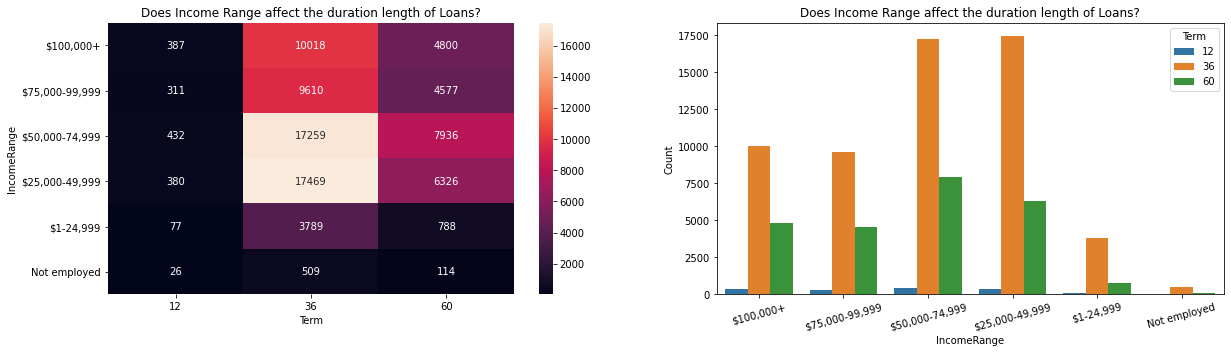

In [14]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('Does Income Range affect the duration length of Loans?')
sb.heatmap(income_term, annot = True, fmt = 'd');
plt.subplot(1,2,2)
plt.title('Does Income Range affect the duration length of Loans?')
sb.countplot(data=loans_edited, x='IncomeRange', hue='Term')
plt.ylabel('Count')
plt.xticks(rotation=15);

## Does Stated Monthly Income affect the Monthly Loan Payment or Loan Original Amount?


> We can observe that there's a positive relationship between Monthly Loan Payment and Loan Original Amount. The relationship between stated monthly income and either loan original amount is weak positive relationship which means that stated monthly income has very low effect on Loan Original Amount or Monthly Loan Payment. Most of the values are between 0 and 0.1.

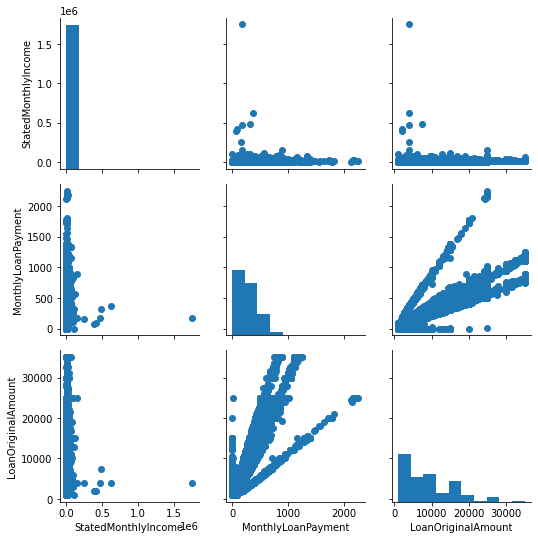

In [15]:
multiplots = sb.PairGrid(data = loans_edited, vars = ['StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount'])
multiplots.map_diag(plt.hist)
multiplots.map_offdiag(plt.scatter);

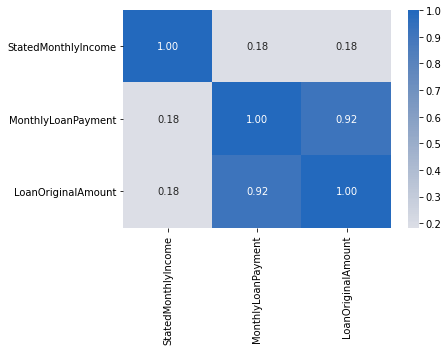

In [16]:
monthly_loan = loans_edited[['StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']]
sb.heatmap(monthly_loan.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

In [17]:
!!jupyter nbconvert slide_deck.ipynb --to slides --no-input

['[NbConvertApp] Converting notebook slide_deck.ipynb to slides',
 '[NbConvertApp] Writing 769339 bytes to slide_deck.slides.html']